## Support Vector Machines

Support Vector Machines (SVM) aim to divide your data into two classes using a hyperplane in n-dimensional space. It tries to separate the data by making the margin between the two classes as wide as possible, which is why it's also called a **Large Margin Classifier**.

### SVM Hyperparameters

- **C**: The penalty term that affects the smoothness of the decision boundary. This is a trade-off between making the model more stable versus more accurate. A smaller value of C will make the boundary smoother, while a higher value of C will try to classify all examples correctly, potentially leading to non-smooth curves.

- **gamma**: This value indicates the influence of a single variable. A small gamma value means that a variable has influence over long distances, affecting the classification of points even if they are far apart. Conversely, a large gamma value indicates lower influence, meaning the variable affects only nearby points.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Social_Network_Ads.csv')

# Select the features (columns 2 and 3) for the input variable 'x'
# iloc is used for integer-location based indexing
# df.iloc[:, 2:4] selects all rows and columns 2 to 3 (4 is exclusive)
x = df.iloc[:, 2:4]

# Select the target variable 'y' (column 4)
# df.iloc[:, 4] selects all rows and the 4th column
y = df.iloc[:, 4]

# Display the first few rows of the DataFrame
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


C:\Users\men_l\AppData\Local\Temp\ipykernel_31336\1953245669.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


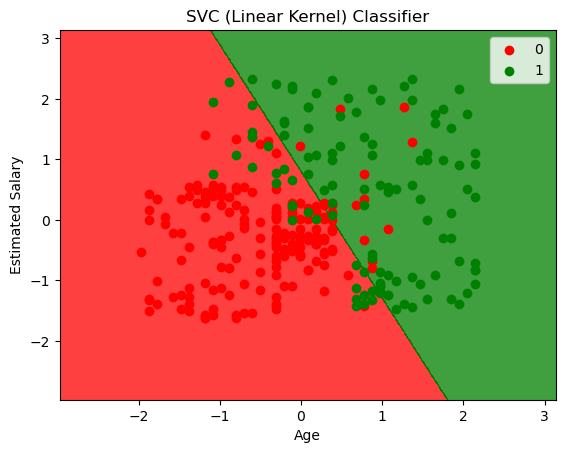

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Split the dataset into training and testing sets
# train_test_split splits arrays or matrices into random train and test subsets
# test_size=0.25 means 25% of the data will be used for testing, and 75% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Standardize features by removing the mean and scaling to unit variance
# StandardScaler standardizes features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# fit_transform computes the mean and std to be used for later scaling and then scales the data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same mean and std from the training data
X_test = scaler.transform(X_test)

# Create and train the Support Vector Classifier with a linear kernel
clf = SVC(kernel='linear', random_state=0).fit(X_train, y_train)

# Visualize the decision boundary
X_set, y_set = X_train, y_train

# Create a meshgrid for plotting
# meshgrid generates coordinate matrices from coordinate vectors
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))

# Plot the decision boundary using contour plot
# contourf creates filled contour plots
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot the training points
# enumerate adds a counter to an iterable and returns it as an enumerate object
# np.unique finds the unique elements of an array
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

# Set plot limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Add title and labels
plt.title('SVC (Linear Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import confusion_matrix
# Predict the target values for the test set
# clf.predict uses the trained model to predict the labels for the test data
y_pred = clf.predict(X_test)

# Compute the confusion matrix to evaluate the accuracy of the classification
# confusion_matrix compares the true labels (y_test) with the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  6]
 [ 8 21]]


C:\Users\men_l\AppData\Local\Temp\ipykernel_31336\2643558265.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


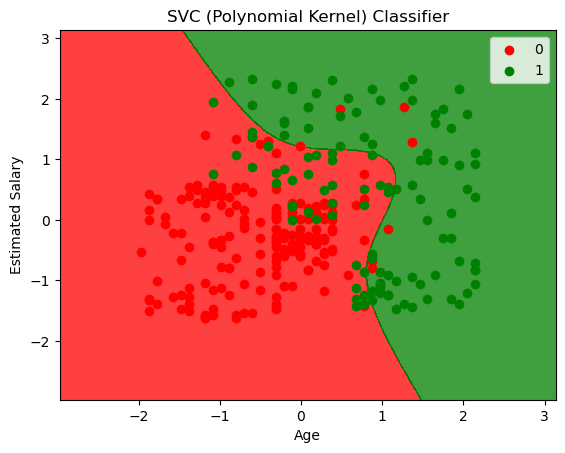

In [10]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Create and train the Support Vector Classifier with a polynomial kernel
clf = SVC(kernel='poly', random_state=0).fit(X_train, y_train)

# Visualize the decision boundary
X_set, y_set = X_train, y_train

# Create a meshgrid for plotting
# meshgrid generates coordinate matrices from coordinate vectors
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))

# Plot the decision boundary using contour plot
# contourf creates filled contour plots
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot the training points
# enumerate adds a counter to an iterable and returns it as an enumerate object
# np.unique finds the unique elements of an array
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

# Set plot limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Add title and labels
plt.title('SVC (Polynomial Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [11]:
# Predict the target values for the test set
# clf.predict uses the trained model to predict the labels for the test data
y_pred = clf.predict(X_test)

# Compute the confusion matrix to evaluate the accuracy of the classification
# confusion_matrix compares the true labels (y_test) with the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  5]
 [11 18]]
